In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances

# Try to import seaborn for better styling (optional)
try:
    import seaborn as sns
    sns.set_palette("husl")
    plt.style.use('seaborn-v0_8-darkgrid')
except ImportError:
    plt.style.use('default')
    print("Note: seaborn not available, using default matplotlib style")

In [28]:
# Load the dataset
df = pd.read_csv('../data/Students Social Media Addiction.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (705, 13)

Columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']

First few rows:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [29]:
# Data exploration
print("Dataset Info:")
print(df.info())
print("\n\nBasic Statistics:")
print(df.describe())
print("\n\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    str    
 3   Academic_Level                705 non-null    str    
 4   Country                       705 non-null    str    
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    str    
 7   Affects_Academic_Performance  705 non-null    str    
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    str    
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes:

In [30]:
# Prepare data for clustering
# Select numerical features for clustering
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                      'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

# Create a copy for preprocessing
df_cluster = df[numerical_features].copy()

# Encode categorical variables if needed for additional features
le_gender = LabelEncoder()
le_academic = LabelEncoder()
le_platform = LabelEncoder()
le_performance = LabelEncoder()

df_cluster['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])
df_cluster['Academic_Level_Encoded'] = le_academic.fit_transform(df['Academic_Level'])
df_cluster['Platform_Encoded'] = le_platform.fit_transform(df['Most_Used_Platform'])
df_cluster['Affects_Performance_Encoded'] = le_performance.fit_transform(df['Affects_Academic_Performance'])

# Standardize the features
scaler = StandardScaler()
features_for_clustering = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                          'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score',
                          'Gender_Encoded', 'Academic_Level_Encoded', 'Platform_Encoded', 
                          'Affects_Performance_Encoded']

X_scaled = scaler.fit_transform(df_cluster[features_for_clustering])

print(f"Scaled data shape: {X_scaled.shape}")
print(f"Features used: {features_for_clustering}")

Scaled data shape: (705, 10)
Features used: ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Gender_Encoded', 'Academic_Level_Encoded', 'Platform_Encoded', 'Affects_Performance_Encoded']


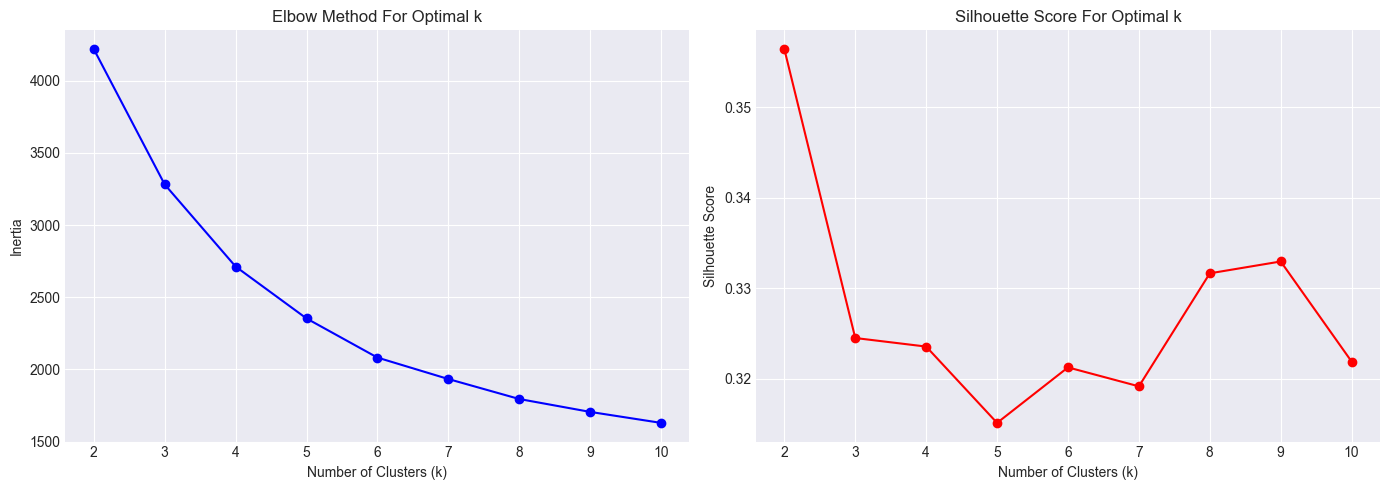

Optimal number of clusters (based on silhouette score): 2
Best silhouette score: 0.356


In [31]:
# Determine optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score For Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (based on silhouette score): {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

In [32]:
# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"Clustering completed with {optimal_k} clusters")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Clustering completed with 2 clusters

Cluster distribution:
Cluster
0    267
1    438
Name: count, dtype: int64


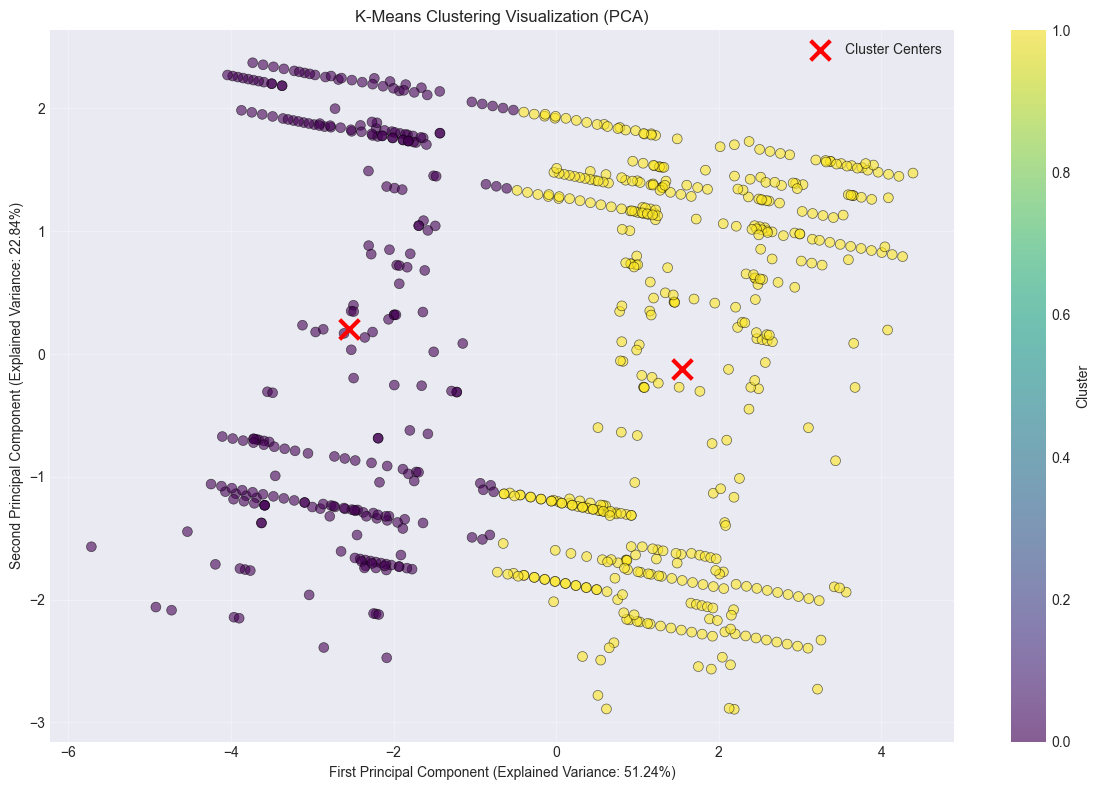

Total explained variance by first 2 components: 74.08%


In [33]:
# Visualize clusters using PCA (dimensionality reduction for 2D visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create cluster visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', 
           s=200, linewidths=3, label='Cluster Centers')

plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('K-Means Clustering Visualization (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total explained variance by first 2 components: {pca.explained_variance_ratio_.sum():.2%}")

In [34]:
# Analyze cluster characteristics
print("Cluster Characteristics:\n")
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n{'='*60}")
    print(f"Cluster {cluster_id} ({len(cluster_data)} students)")
    print(f"{'='*60}")
    print(f"Average Daily Usage Hours: {cluster_data['Avg_Daily_Usage_Hours'].mean():.2f}")
    print(f"Average Sleep Hours: {cluster_data['Sleep_Hours_Per_Night'].mean():.2f}")
    print(f"Average Mental Health Score: {cluster_data['Mental_Health_Score'].mean():.2f}")
    print(f"Average Addicted Score: {cluster_data['Addicted_Score'].mean():.2f}")
    print(f"Average Conflicts: {cluster_data['Conflicts_Over_Social_Media'].mean():.2f}")
    print(f"\nMost Common Platform: {cluster_data['Most_Used_Platform'].mode()[0]}")
    print(f"Affects Performance (Yes %): {(cluster_data['Affects_Academic_Performance'] == 'Yes').sum() / len(cluster_data) * 100:.1f}%")

Cluster Characteristics:


Cluster 0 (267 students)
Average Daily Usage Hours: 3.81
Average Sleep Hours: 7.83
Average Mental Health Score: 7.40
Average Addicted Score: 4.67
Average Conflicts: 1.85

Most Common Platform: Facebook
Affects Performance (Yes %): 5.6%

Cluster 1 (438 students)
Average Daily Usage Hours: 5.59
Average Sleep Hours: 6.28
Average Mental Health Score: 5.51
Average Addicted Score: 7.51
Average Conflicts: 3.46

Most Common Platform: Instagram
Affects Performance (Yes %): 100.0%


In [35]:
# Graph Analysis: Create similarity network based on student characteristics
# We'll create edges between students who are similar in key metrics

# Calculate pairwise distances between students using sklearn
distances = pairwise_distances(X_scaled, metric='euclidean')

# Create adjacency matrix (connect students within a similarity threshold)
threshold = np.percentile(distances[distances > 0], 10)  # Connect top 10% most similar
adjacency_matrix = (distances < threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Remove self-connections

# Count connections per student
df['Num_Connections'] = adjacency_matrix.sum(axis=1)

print(f"Graph Statistics:")
print(f"Number of nodes (students): {len(df)}")
print(f"Number of edges (connections): {adjacency_matrix.sum() // 2}")
print(f"Average connections per student: {df['Num_Connections'].mean():.2f}")
print(f"Threshold used: {threshold:.3f}")

Graph Statistics:
Number of nodes (students): 705
Number of edges (connections): 24839
Average connections per student: 70.47
Threshold used: 2.341


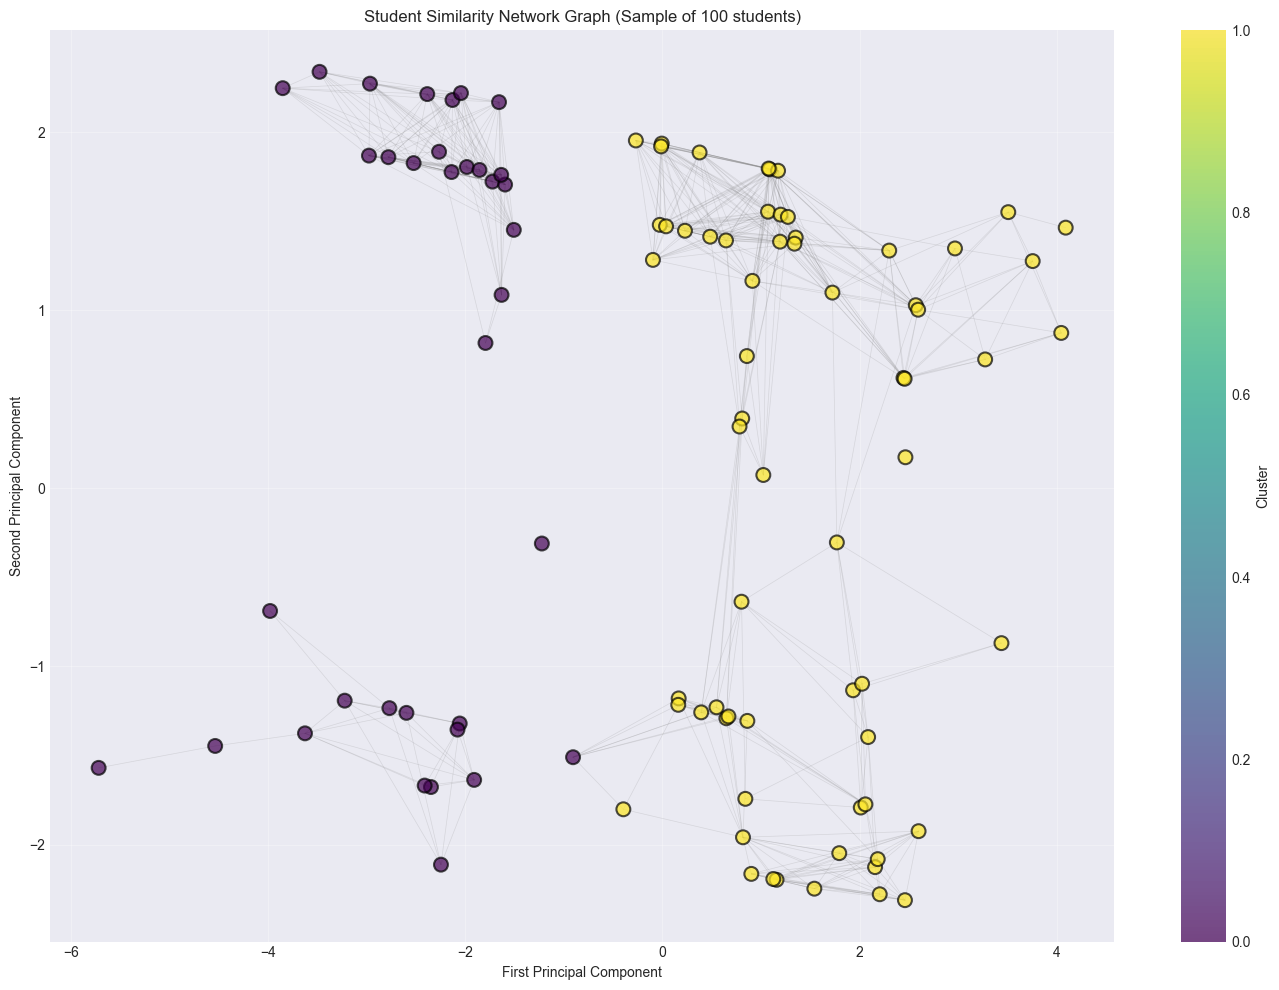

In [36]:
# Visualize the graph network using a force-directed layout
# We'll use a simplified visualization showing connections

# Sample a subset for visualization (to avoid overcrowding)
sample_size = min(100, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
sample_adj = adjacency_matrix[np.ix_(sample_indices, sample_indices)]
sample_pca = X_pca[sample_indices]
sample_clusters = cluster_labels[sample_indices]

# Create graph visualization
plt.figure(figsize=(14, 10))

# Plot edges
for i in range(len(sample_indices)):
    for j in range(i+1, len(sample_indices)):
        if sample_adj[i, j] == 1:
            plt.plot([sample_pca[i, 0], sample_pca[j, 0]], 
                    [sample_pca[i, 1], sample_pca[j, 1]], 
                    'gray', alpha=0.2, linewidth=0.5, zorder=1)

# Plot nodes colored by cluster
scatter = plt.scatter(sample_pca[:, 0], sample_pca[:, 1], 
                     c=sample_clusters, cmap='viridis', 
                     s=100, alpha=0.7, edgecolors='black', 
                     linewidth=1.5, zorder=2)

plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title(f'Student Similarity Network Graph (Sample of {sample_size} students)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

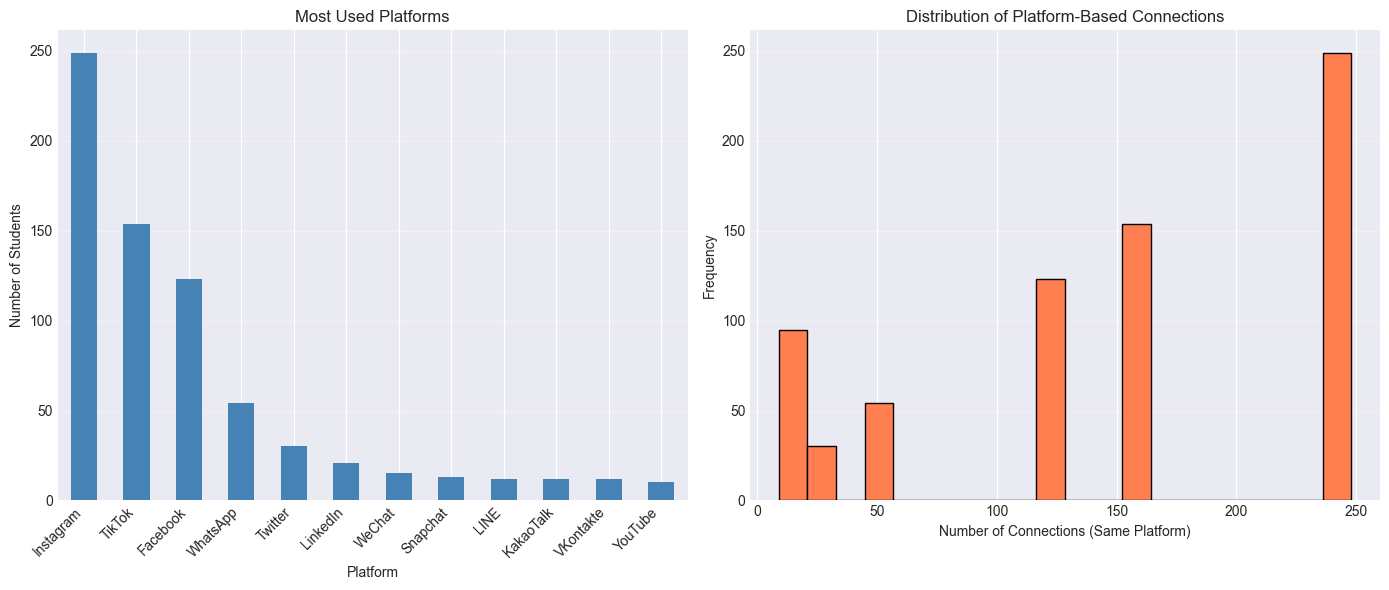


Platform Network Statistics:
Total platform-based connections: 52662
Average connections per student: 149.40


In [37]:
# Alternative: Platform-based network graph
# Create connections based on students using the same platform
platform_adjacency = np.zeros((len(df), len(df)))

for platform in df['Most_Used_Platform'].unique():
    platform_users = df[df['Most_Used_Platform'] == platform].index
    for i in platform_users:
        for j in platform_users:
            if i != j:
                platform_adjacency[i, j] = 1

# Count platform-based connections
df['Platform_Connections'] = platform_adjacency.sum(axis=1)

# Visualize platform network
platform_counts = df['Most_Used_Platform'].value_counts()

plt.figure(figsize=(14, 6))

# Bar chart of platform usage
plt.subplot(1, 2, 1)
platform_counts.plot(kind='bar', color='steelblue')
plt.title('Most Used Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Platform connections distribution
plt.subplot(1, 2, 2)
plt.hist(df['Platform_Connections'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Platform-Based Connections')
plt.xlabel('Number of Connections (Same Platform)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nPlatform Network Statistics:")
print(f"Total platform-based connections: {int(platform_adjacency.sum() / 2)}")
print(f"Average connections per student: {df['Platform_Connections'].mean():.2f}")

/var/folders/_w/q6t3xdsx6fgbj6m3t2kgb59r0000gn/T/ipykernel_30679/384310483.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([df[df['Cluster'] == i]['Avg_Daily_Usage_Hours'] for i in sorted(df['Cluster'].unique())],
/var/folders/_w/q6t3xdsx6fgbj6m3t2kgb59r0000gn/T/ipykernel_30679/384310483.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([df[df['Cluster'] == i]['Addicted_Score'] for i in sorted(df['Cluster'].unique())],
/var/folders/_w/q6t3xdsx6fgbj6m3t2kgb59r0000gn/T/ipykernel_30679/384310483.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df[df['Cl

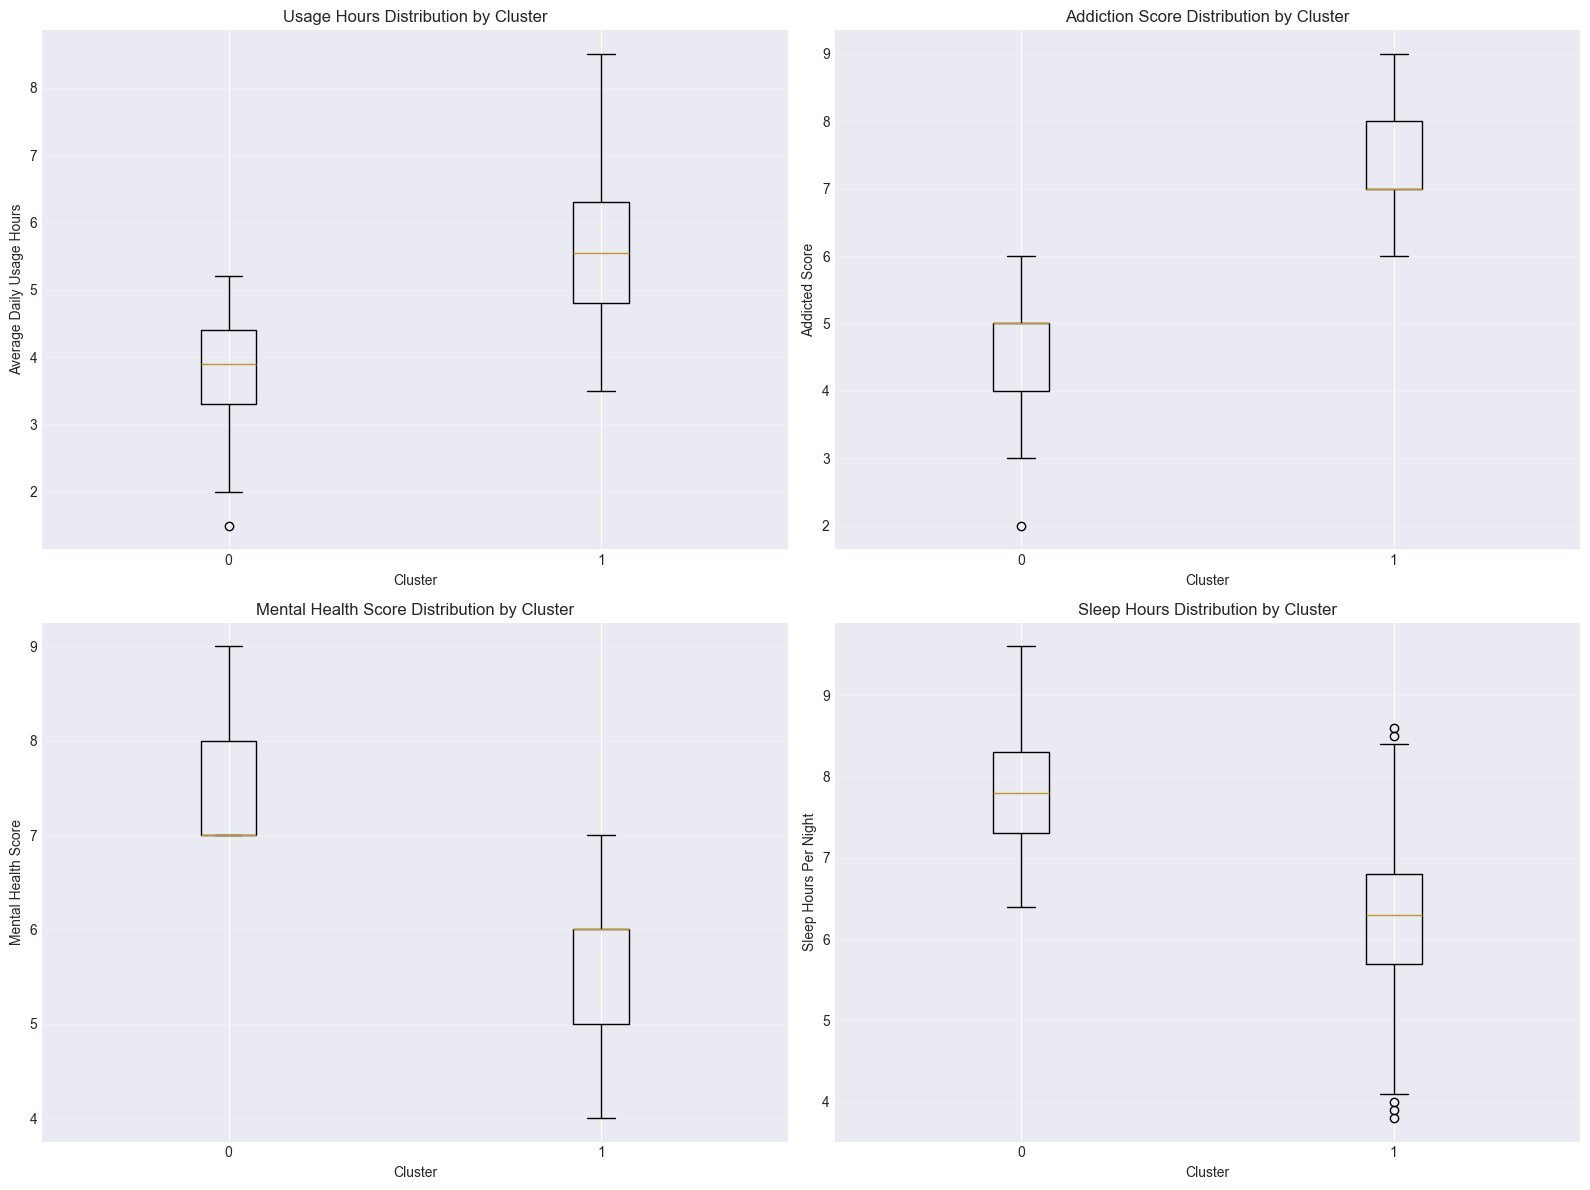

In [38]:
# Combined visualization: Clusters vs Key Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Usage Hours by Cluster
axes[0, 0].boxplot([df[df['Cluster'] == i]['Avg_Daily_Usage_Hours'] for i in sorted(df['Cluster'].unique())],
                   labels=sorted(df['Cluster'].unique()))
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Daily Usage Hours')
axes[0, 0].set_title('Usage Hours Distribution by Cluster')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Addicted Score by Cluster
axes[0, 1].boxplot([df[df['Cluster'] == i]['Addicted_Score'] for i in sorted(df['Cluster'].unique())],
                   labels=sorted(df['Cluster'].unique()))
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Addicted Score')
axes[0, 1].set_title('Addiction Score Distribution by Cluster')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Mental Health Score by Cluster
axes[1, 0].boxplot([df[df['Cluster'] == i]['Mental_Health_Score'] for i in sorted(df['Cluster'].unique())],
                   labels=sorted(df['Cluster'].unique()))
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Mental Health Score')
axes[1, 0].set_title('Mental Health Score Distribution by Cluster')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Sleep Hours by Cluster
axes[1, 1].boxplot([df[df['Cluster'] == i]['Sleep_Hours_Per_Night'] for i in sorted(df['Cluster'].unique())],
                   labels=sorted(df['Cluster'].unique()))
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Sleep Hours Per Night')
axes[1, 1].set_title('Sleep Hours Distribution by Cluster')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [39]:
# Summary: Key insights from clustering and graph analysis
print("="*70)
print("CLUSTERING AND GRAPH ANALYSIS SUMMARY")
print("="*70)

print(f"\n1. CLUSTERING RESULTS:")
print(f"   - Optimal number of clusters: {optimal_k}")
print(f"   - Silhouette score: {max(silhouette_scores):.3f}")
for cluster_id in sorted(df['Cluster'].unique()):
    count = (df['Cluster'] == cluster_id).sum()
    pct = count / len(df) * 100
    print(f"   - Cluster {cluster_id}: {count} students ({pct:.1f}%)")

print(f"\n2. GRAPH ANALYSIS RESULTS:")
print(f"   - Similarity-based connections: {int(adjacency_matrix.sum() / 2)} edges")
print(f"   - Platform-based connections: {int(platform_adjacency.sum() / 2)} edges")
print(f"   - Average similarity connections per student: {df['Num_Connections'].mean():.2f}")
print(f"   - Average platform connections per student: {df['Platform_Connections'].mean():.2f}")

print(f"\n3. KEY INSIGHTS:")
high_addiction = df[df['Addicted_Score'] >= 7]
print(f"   - High addiction students (score >= 7): {len(high_addiction)} ({len(high_addiction)/len(df)*100:.1f}%)")
print(f"   - Average usage for high addiction: {high_addiction['Avg_Daily_Usage_Hours'].mean():.2f} hours/day")
print(f"   - Average sleep for high addiction: {high_addiction['Sleep_Hours_Per_Night'].mean():.2f} hours/night")

print("\n" + "="*70)

CLUSTERING AND GRAPH ANALYSIS SUMMARY

1. CLUSTERING RESULTS:
   - Optimal number of clusters: 2
   - Silhouette score: 0.356
   - Cluster 0: 267 students (37.9%)
   - Cluster 1: 438 students (62.1%)

2. GRAPH ANALYSIS RESULTS:
   - Similarity-based connections: 24839 edges
   - Platform-based connections: 52662 edges
   - Average similarity connections per student: 70.47
   - Average platform connections per student: 149.40

3. KEY INSIGHTS:
   - High addiction students (score >= 7): 408 (57.9%)
   - Average usage for high addiction: 5.67 hours/day
   - Average sleep for high addiction: 6.21 hours/night

